<a href="https://colab.research.google.com/github/dsdojocausuri/hello-world/blob/master/SimpleRegressionFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

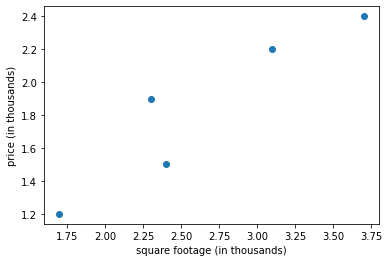

In [124]:
#@title Univariate Linear Regression with Gradient descent method
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error as mse
import pandas as pd

x = np.array([1.7, 2.4, 2.3, 3.1, 3.7])
y = np.array([1.2,1.5,1.9,2.2,2.4])

#x = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
#y = np.array([250, 300, 480,  430,   630, 730])

plt.xlabel('square footage (in thousands)')
plt.ylabel('price (in thousands)')
plt.scatter(x,y)
plt.show()

In [125]:
def cost(x, y, m):

  b = 1.1
  y_pred = []

  for i in range(len(x)):
    tmp = x[i] * m + b
    y_pred.append(tmp)

    #print(f'Iter = {i}, tmp = {tmp}, y_pred = {y_pred}')

  total_cost = mse(y, y_pred)
  #print(f'total cost = {total_cost}')
  return total_cost

In [137]:
slope = [i/100 for i in range(0,150)]

Err = []
for i in slope:
  total_cost = cost(x, y, m = i)
  Err.append(total_cost)

Cost_table = pd.DataFrame({
'm' : slope,
'Cost' : Err
})

print(Cost_table)

        m       Cost
0    0.00   0.742000
1    0.01   0.697985
2    0.02   0.655459
3    0.03   0.614423
4    0.04   0.574877
..    ...        ...
145  1.45   9.911220
146  1.46  10.083197
147  1.47  10.256663
148  1.48  10.431619
149  1.49  10.608065

[150 rows x 2 columns]


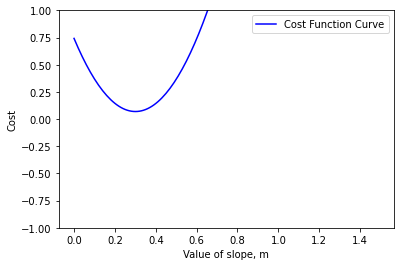

In [139]:
plt.plot(Cost_table.m, Cost_table.Cost, color = 'blue', label = 'Cost Function Curve')
plt.xlabel('Value of slope, m')
plt.ylabel('Cost')
plt.ylim(-1,1)
plt.legend()

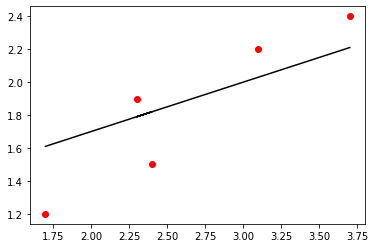

In [141]:
line = []

# generating predictions for every data point
for i in range(len(x)):
    line.append(x[i]*0.3 + 1.1)
plt.scatter(x,y, color = 'red')
plt.plot(x, line, color = 'black', label = 'line')

In [ ]:
def gradientDescent(x,y, num_iter,learning_rate,c, m):
    cost_history = []
    m_history = []
    c_history = []
    
    for i in range(num_iter):
        y_tmp = m * x + c
        cost_func = (1/2*len(x)) * sum(l**2 for l in (y - y_tmp))
        m_new = m - learning_rate * - (1/len(x)) * sum(x * (y - y_tmp))
        c_new = c - learning_rate * - (1/len(x)) * sum(y - y_tmp)
        m = m_new
        c = c_new
        if i% math.ceil(num_iter/10) == 0:          
            print(f"Iteration {i:4} : Cost {cost_func:0.2e}   ",
                  f"slope: {m_new: 0.3e}, intercept:{c_new: 0.5e}")
        c_history.append(c_new)
        m_history.append(m_new)
        cost_history.append(cost_func)
    return cost_history,m_history,c_history, m,c